<a href="https://colab.research.google.com/github/Vimal9900/College-Work/blob/main/Vimal_Kumar_Verma_(M24MAC015)_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset:
Congressional Voting Records: https://archive.ics.uci.edu/dataset/105/congressional+voting+records


## Import dataset

In [206]:
pip install ucimlrepo

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score,adjusted_rand_score,v_measure_score


import warnings
warnings.filterwarnings('ignore')

In [208]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
congressional_voting_records = fetch_ucirepo(id=105)

x = congressional_voting_records.data.features
y = congressional_voting_records.data.targets

This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA.  The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).

In [209]:
data=pd.concat([x,y],axis=1)

In [210]:
data.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [211]:
column=data.columns
print(data[data[column]=='?'].count())

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64


In [212]:
data.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
count,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y,democrat
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269,267


Each feature and label values are binary and have null values

In [213]:
data.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


Shows the difference in voting behavior between the two parties for the 'education-spending' bill, with each (class name)party colored differently.

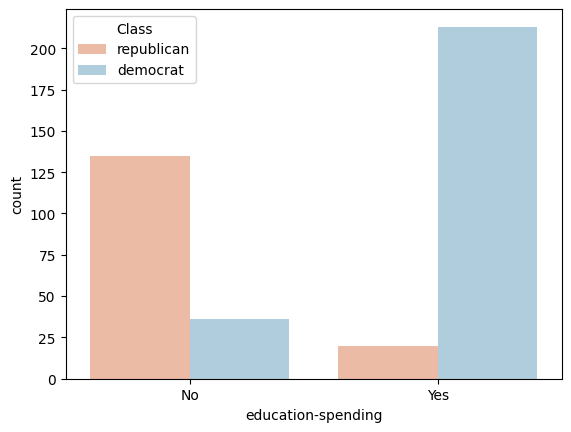

In [214]:
plt.figure()
sns.countplot(x='education-spending', hue='Class', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

To know which ones do Democrats vote resoundingly in favor of,compared to Republicans out of these bills(satellite and missile)?

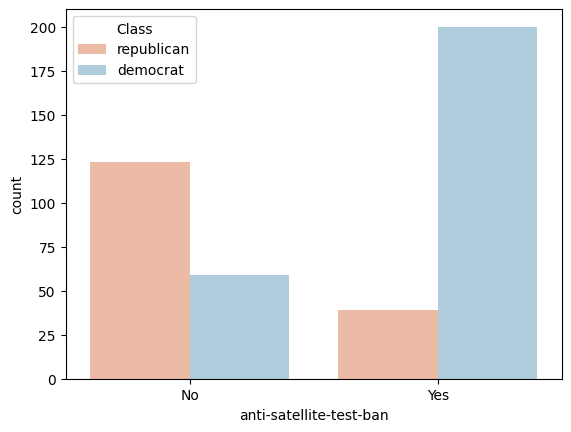

In [215]:
plt.figure()
sns.countplot(x='anti-satellite-test-ban',hue='Class',data=data, palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

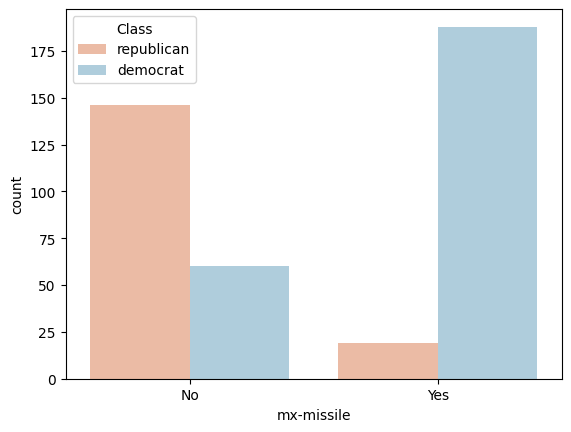

In [216]:
plt.figure()
sns.countplot(x='mx-missile',hue='Class',data=data, palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

## Problem 1: Clustering-Gaussian Mixture Models (GMM)



### By dropping NULL values

In [217]:
x_y_dropna=data.copy()

In [218]:
x_y_dropna.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat


In [219]:
x_y_dropna.isna().sum()

,0
handicapped-infants,12
water-project-cost-sharing,48
adoption-of-the-budget-resolution,11
physician-fee-freeze,11
el-salvador-aid,15
religious-groups-in-schools,11
anti-satellite-test-ban,14
aid-to-nicaraguan-contras,15
mx-missile,22
immigration,7


In [220]:
x_y_dropna.shape

(435, 17)

In [221]:
x_y_dropna.dropna(inplace=True)
x_y_dropna.isnull().sum()

,0
handicapped-infants,0
water-project-cost-sharing,0
adoption-of-the-budget-resolution,0
physician-fee-freeze,0
el-salvador-aid,0
religious-groups-in-schools,0
anti-satellite-test-ban,0
aid-to-nicaraguan-contras,0
mx-missile,0
immigration,0


In [222]:
x_y_dropna.shape

(232, 17)

After dropping approx half of the data points get removed

In [223]:
le=LabelEncoder()
x_y_dropna = x_y_dropna.apply(le.fit_transform)

In [224]:
x_y_dropna['export-administration-act-south-africa'].value_counts()

,count
export-administration-act-south-africa,
1,189
0,43


In [225]:
x_dropna = x_y_dropna.drop('Class', axis=1)
y_dropna = x_y_dropna['Class']


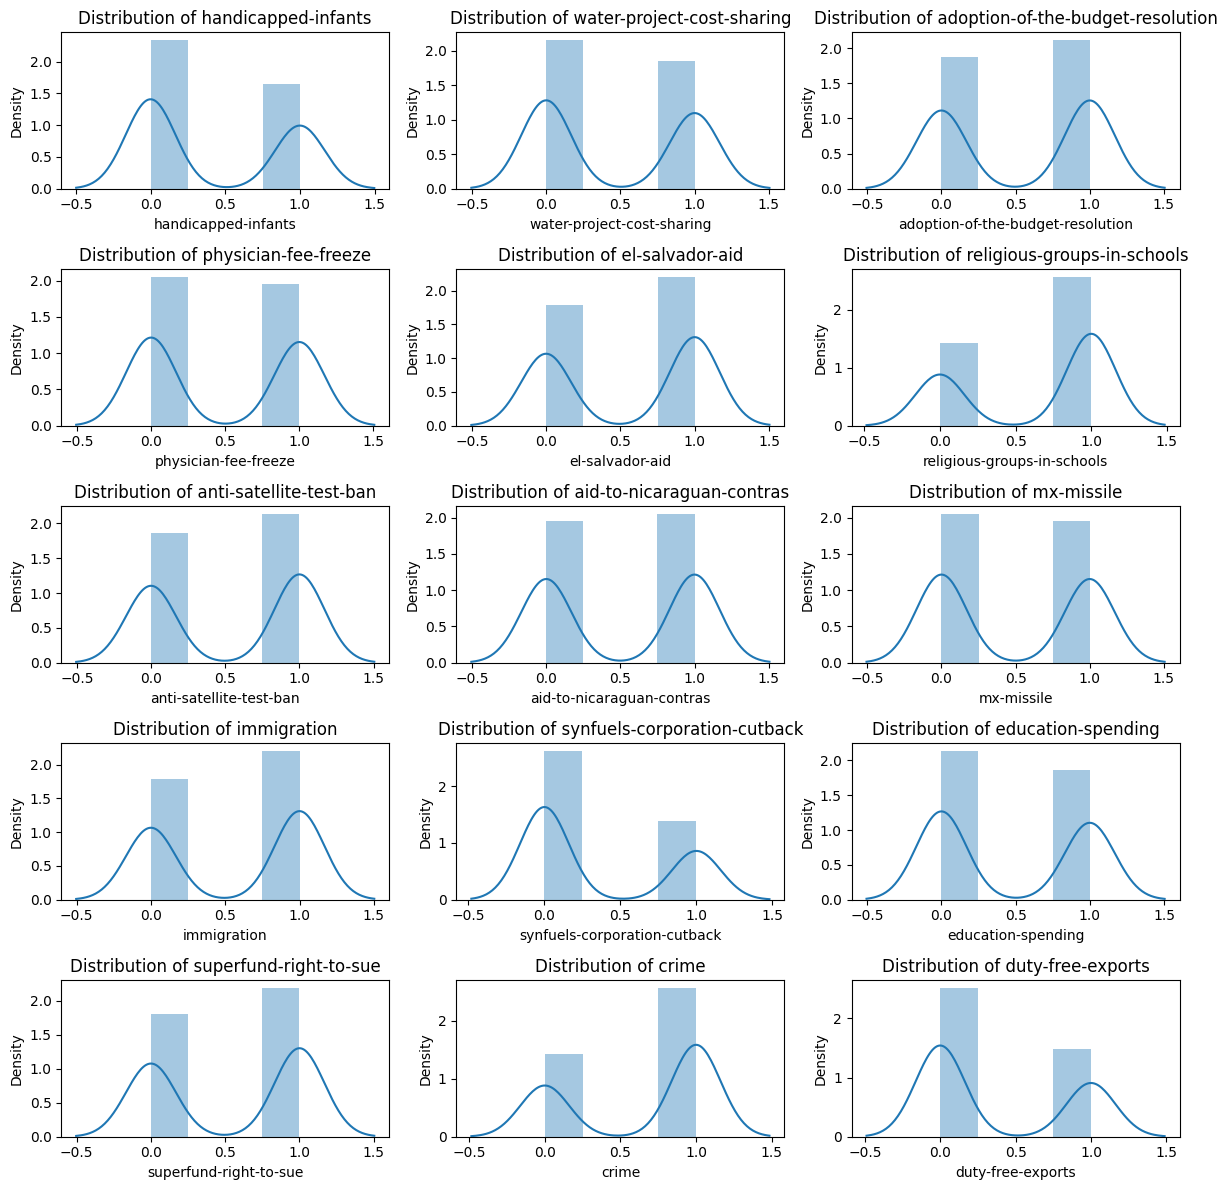

In [226]:
num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, column in enumerate(x_dropna.columns[:num_rows * num_cols]):
    row = i // num_cols
    col = i % num_cols
    sns.distplot(x_dropna[column], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [227]:
gmm = GMM(n_components=2, random_state=0)
gmm.fit(x_dropna)

GaussianMixture(n_components=2, random_state=0)

In [228]:
silhouette_dropna = silhouette_score(x_dropna, gmm.predict(x_dropna),metric='euclidean')

In [229]:
ari_dropna = adjusted_rand_score(y_dropna, gmm.predict(x_dropna))
v_measure_dropna = v_measure_score(y_dropna, gmm.predict(x_dropna))

print(f"Adjusted Rand Index (ARI): {ari_dropna}")
print(f"V-Measure: {v_measure_dropna}")

Adjusted Rand Index (ARI): 0.6137484368389687
V-Measure: 0.5324133596578244


### By Imputing null values with mode

In [230]:
data_imputed=data.copy()

In [231]:
data_imputed.isna().sum()

,0
handicapped-infants,12
water-project-cost-sharing,48
adoption-of-the-budget-resolution,11
physician-fee-freeze,11
el-salvador-aid,15
religious-groups-in-schools,11
anti-satellite-test-ban,14
aid-to-nicaraguan-contras,15
mx-missile,22
immigration,7


In [232]:
le=LabelEncoder()
data_imputed = data_imputed.apply(le.fit_transform)

In [233]:
data_imputed=data_imputed.fillna(data_imputed.mode())

In [234]:
data_imputed.isna().sum()

,0
handicapped-infants,0
water-project-cost-sharing,0
adoption-of-the-budget-resolution,0
physician-fee-freeze,0
el-salvador-aid,0
religious-groups-in-schools,0
anti-satellite-test-ban,0
aid-to-nicaraguan-contras,0
mx-missile,0
immigration,0


In [235]:
x_imputed = data_imputed.drop('Class', axis=1)
y_imputed = data_imputed['Class']

In [236]:
gmm_imputed=GMM(n_components=2, random_state=0)
gmm_imputed.fit(x_imputed)

GaussianMixture(n_components=2, random_state=0)

In [237]:
silhouette_mode_imputed = silhouette_score(x_imputed, gmm_imputed.predict(x_imputed),metric='euclidean')
print(f"Silhouette Score (mode Imputation): {silhouette_mode_imputed}")

Silhouette Score (mode Imputation): 0.26164356877672296


In [238]:
ari_mode_imputed = adjusted_rand_score(y_imputed, gmm_imputed.predict(x_imputed))
v_measure_mode_imputed = v_measure_score(y_imputed, gmm_imputed.predict(x_imputed))

print(f"Adjusted Rand Index (ARI) (mode Imputation): {ari_mode_imputed}")
print(f"V-Measure (mode Imputation): {v_measure_mode_imputed}")

Adjusted Rand Index (ARI) (mode Imputation): 0.4839853467626174
V-Measure (mode Imputation): 0.4096968407065735


**Potential Reasons for Reduced Accuracy with Imputation:**

Distortion of cluster structure: Filling missing values with the mode can introduce noise or bias into the data, leading to a less clear cluster structure.
Increased data heterogeneity: Imputation can increase the heterogeneity within clusters, making it more difficult for GMM to effectively separate them.
Mode might not represent true value: In some cases, the mode might not be an accurate representation of the true missing values.
Possible Solutions to Improve Clustering with Imputation:

**KNN Imputation**: Used K-Nearest Neighbors to estimate missing values based on similar data points. This can potentially preserve the cluster structure better.

### KNN imputation

In [239]:
from sklearn.impute import KNNImputer

data_knn_imputed = data.copy()

# Apply label encoding to categorical features
le = LabelEncoder()
for column in data_knn_imputed.columns:
    if data_knn_imputed[column].dtype == object:
        data_knn_imputed[column] = le.fit_transform(data_knn_imputed[column].astype(str))


# Separate features and target
x_knn_imputed = data_knn_imputed.drop('Class', axis=1)
y_knn_imputed = data_knn_imputed['Class']

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
x_knn_imputed = imputer.fit_transform(x_knn_imputed)


x_knn_imputed = pd.DataFrame(x_knn_imputed, columns=data.drop('Class', axis=1).columns)

# Fit GMM model
gmm_knn_imputed = GMM(n_components=2, random_state=0)
gmm_knn_imputed.fit(x_knn_imputed)

GaussianMixture(n_components=2, random_state=0)

In [240]:
from sklearn.metrics import silhouette_samples

cluster_labels = gmm_knn_imputed.predict(x_knn_imputed)
silhouette_vals = silhouette_samples(x_knn_imputed, cluster_labels)

for i in range(gmm_knn_imputed.n_components):
  ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
  ith_cluster_silhouette_vals.sort()

  silhouette_avg = np.mean(ith_cluster_silhouette_vals)
  print(f"Silhouette score for cluster {i}: {silhouette_avg}")

Silhouette score for cluster 0: 0.3313386473629113
Silhouette score for cluster 1: 0.34903194033288254


In [241]:
# predictions = gmm_knn_imputed.predict(x_knn_imputed)
silhouette_knn_imputed = silhouette_score(x_knn_imputed, cluster_labels, metric='euclidean')
silhouette_knn_imputed

0.33959551741556454

In [242]:
ari_knn_imputed = adjusted_rand_score(y_knn_imputed, gmm_knn_imputed.predict(x_knn_imputed))
v_measure_knn_imputed = v_measure_score(y_knn_imputed, gmm_knn_imputed.predict(x_knn_imputed))

print(f"Adjusted Rand Index (ARI) (KNN Imputation): {ari_knn_imputed}")
print(f"V-Measure (KNN Imputation): {v_measure_knn_imputed}")

Adjusted Rand Index (ARI) (KNN Imputation): 0.5434440599592718
V-Measure (KNN Imputation): 0.4646956053220427


KNN imputation has increased the all scores but it is not able to beat the Drop null values scores

### **Comparision based on diffrent imputation techniques based on GMM clustering**

            Method  Silhouette Score  Adjusted Rand Index  V-Measure
0          Drop NA          0.371794             0.613748   0.532413
1  Mode Imputation          0.261644             0.483985   0.409697
2   KNN Imputation          0.339596             0.543444   0.464696


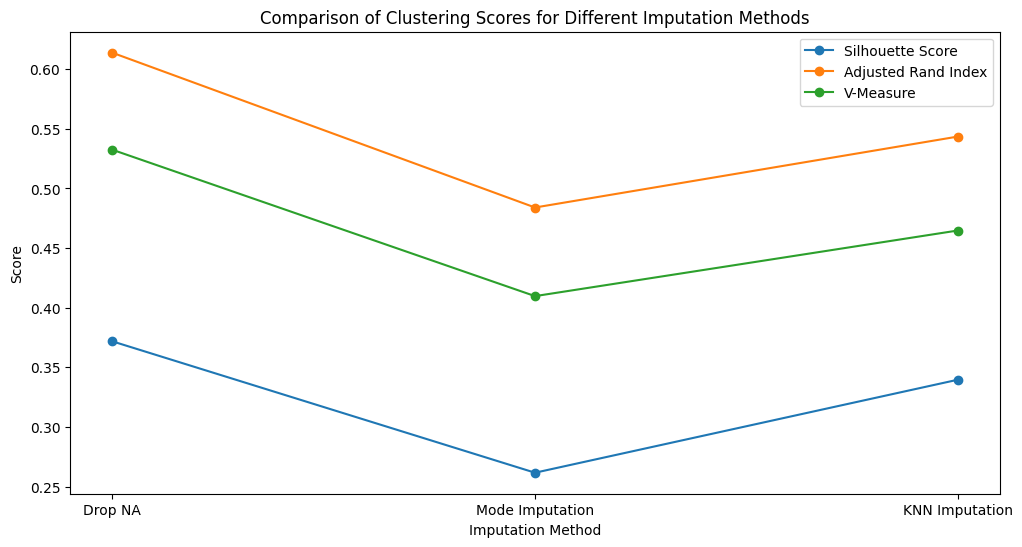

In [243]:
# created dataframe to compare
comparison_df = pd.DataFrame({    'Method': ['Drop NA', 'Mode Imputation', 'KNN Imputation'],
    'Silhouette Score': [silhouette_dropna, silhouette_mode_imputed, silhouette_knn_imputed],
    'Adjusted Rand Index': [ari_dropna, ari_mode_imputed, ari_knn_imputed],
    'V-Measure': [v_measure_dropna, v_measure_mode_imputed, v_measure_knn_imputed]
})

print(comparison_df)

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Method'], comparison_df['Silhouette Score'], label='Silhouette Score', marker='o')
plt.plot(comparison_df['Method'], comparison_df['Adjusted Rand Index'], label='Adjusted Rand Index', marker='o')
plt.plot(comparison_df['Method'], comparison_df['V-Measure'], label='V-Measure', marker='o')
plt.xlabel('Imputation Method')
plt.ylabel('Score')
plt.title('Comparison of Clustering Scores for Different Imputation Methods')
plt.legend()
plt.show()

 - In general, dropping missing values provides better results (higher silhouette score, rand index and V-measure) than imputing them, especially with the mode imputation.
 - KNN imputation shows a slightly better performance compared to the mode imputation, but it still does not surpass the scores obtained when deleting the missing values.
 - When dealing with datasets where missing values are scarce, removing data entries with missing values can be a reasonable approach.
 - **However, it is not reasonable to remove the missing values as it reduces dataset tp half of volume , KNN imputation emerges as the preferred choice for imputation.**

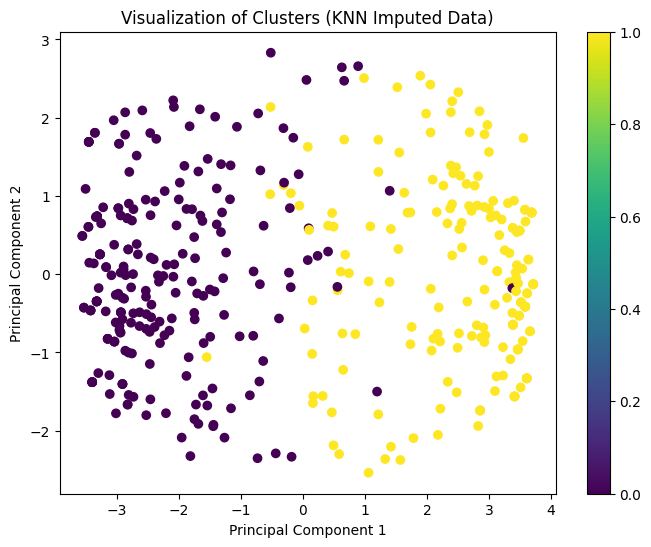

In [244]:
import matplotlib.pyplot as plt

# Get cluster assignments
cluster_labels = gmm_knn_imputed.predict(x_knn_imputed)

# Reduce dimensionality for visualization (using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_knn_imputed)

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Clusters (KNN Imputed Data)')
plt.colorbar()
plt.show()


 **Insights on separability, outliers, and overlap:**
 ---------------------------------------------------

 1. Separability:
    - The clusters in the visualization appear to be somewhat separated, but there is a noticeable overlap in the central region of the plot.
    - This suggests that the GMM model has identified two main groups, but there is some ambiguity in classifying data points near the center.

 2. Outliers:
    - Based on the visualization, there are no obvious outliers that are significantly far from the main clusters.
    - The data points seem to be relatively well-contained within the identified clusters.

 3. Overlap:
    - There is noticeable overlap between the clusters, particularly in the central region.
    - This indicates that there is some ambiguity in the data, and it may be difficult to clearly separate the clusters in that region.
    - Some data points can be assigned to either cluster depending on the threshold chosen for the GMM model.

 Additional observations:

 - Cluster density: The clusters have varying density, with some regions having a higher concentration of data points than others.
 - Cluster shape: The clusters seem to be relatively spherical, but they might have irregular boundaries due to the overlap.
 - Presence of noise: There doesn't appear to be a significant amount of noise or scattered points that are not associated with either of the clusters.

 Conclusion:

 The visualization shows that the GMM model has found two distinct clusters in the data, but there is some overlap between them, particularly in the central area.
 This suggests that there might be some inherent ambiguity in the data, and it may be difficult to assign data points precisely to a cluster in certain regions.
 It is important to further investigate the data and potentially explore different clustering techniques or dimensionality reduction methods to gain more refined insights into the cluster structure.

## Problem 2: Maximum Likelihood Estimation (MLE) for Parameter Estimation

In [245]:
data_knn_imputed['adoption-of-the-budget-resolution'].value_counts()

,count
adoption-of-the-budget-resolution,
2,253
0,171
1,11


<!-- Model Assumptions:

Its a Bernoulli distribution for each feature. Each feature either has a yes or no value (1 or 0), and we estimate the probability of each feature being 1 (or 0) for each class (Republican, Democrat).
For each feature, MLE will estimate the probability
𝜃i that the feature is 1 for each class. -->

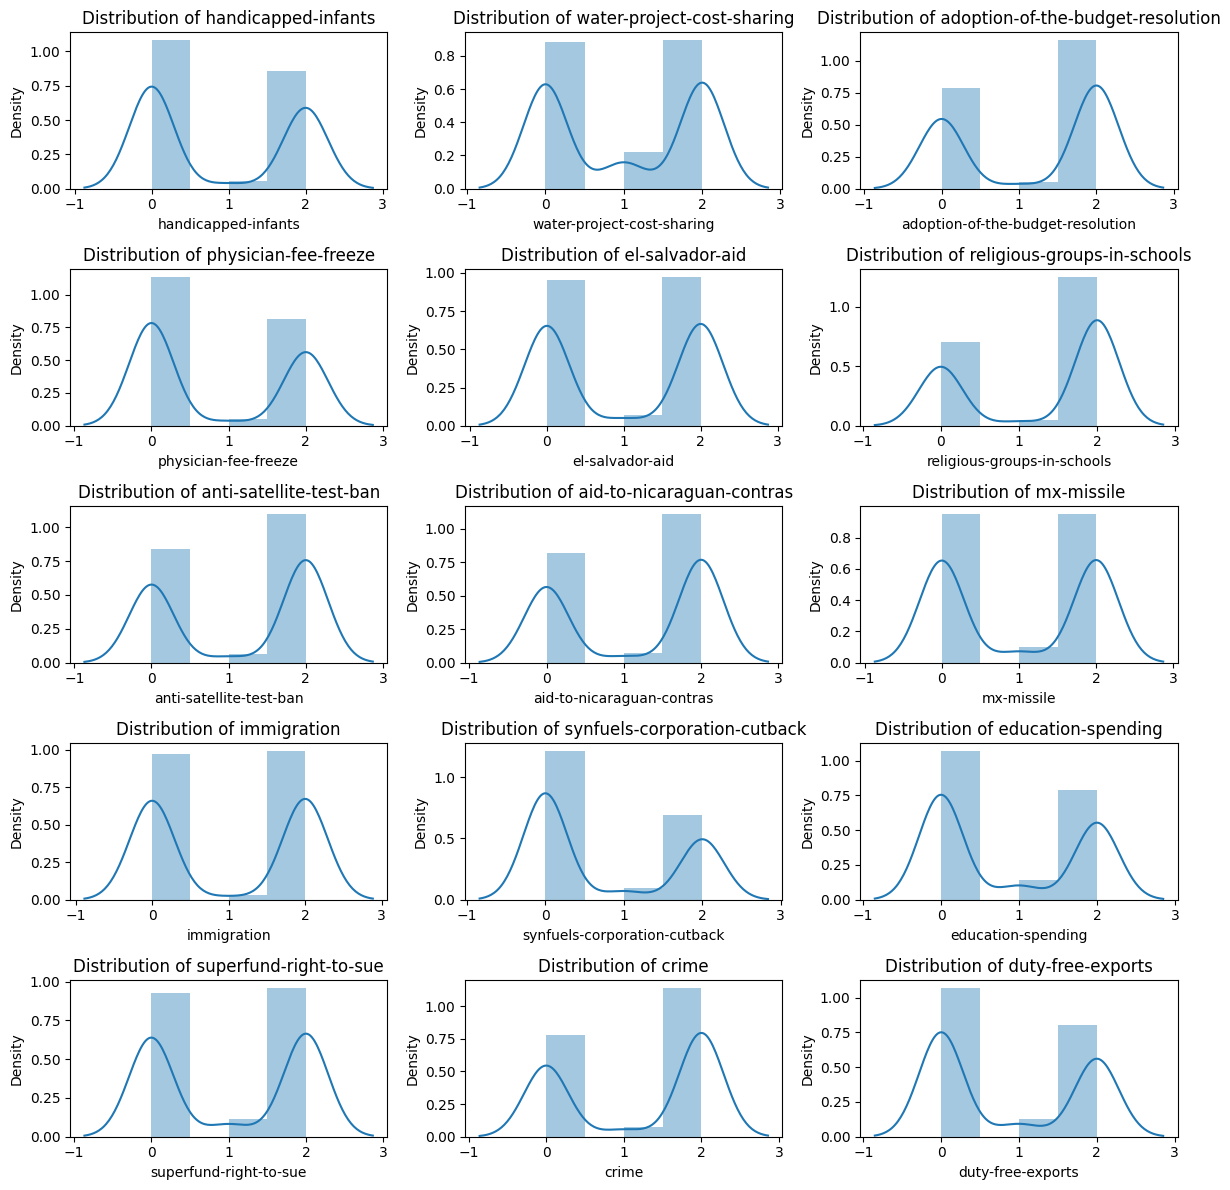

In [246]:
num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, column in enumerate(data_knn_imputed.columns[:num_rows * num_cols]):
    row = i // num_cols
    col = i % num_cols
    sns.distplot(data_knn_imputed[column], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Here i have used KNN imputed data

<Axes: >

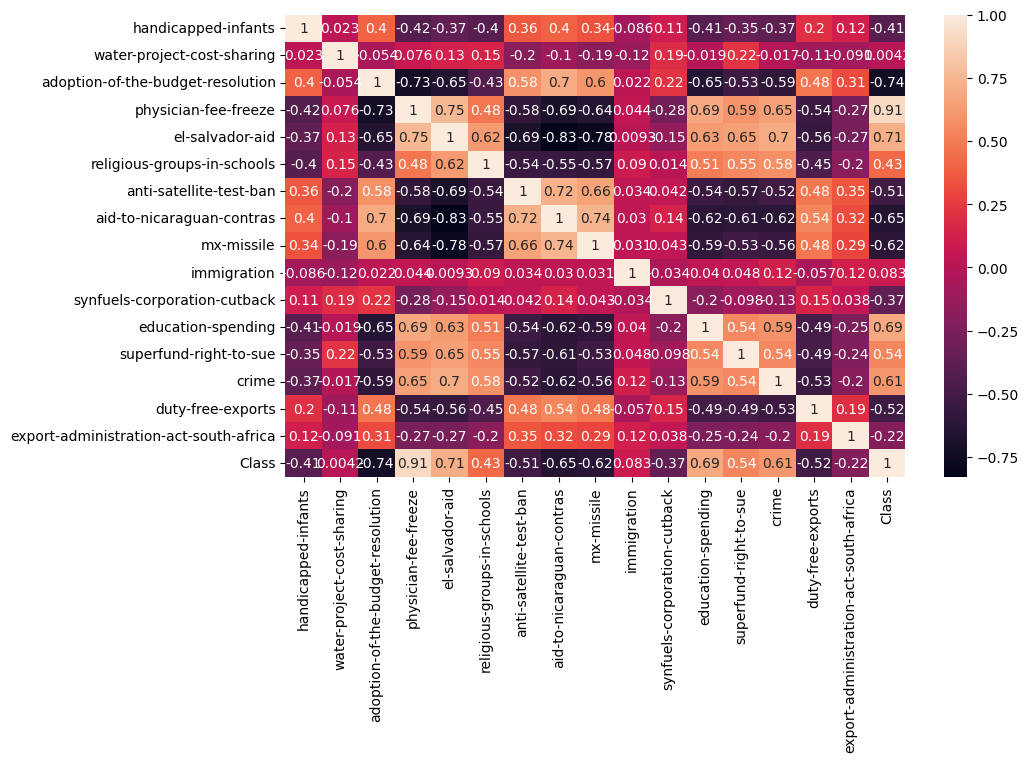

In [247]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_knn_imputed.corr(),annot=True)

Selecting best components in order to increase silhouette_score for GMM

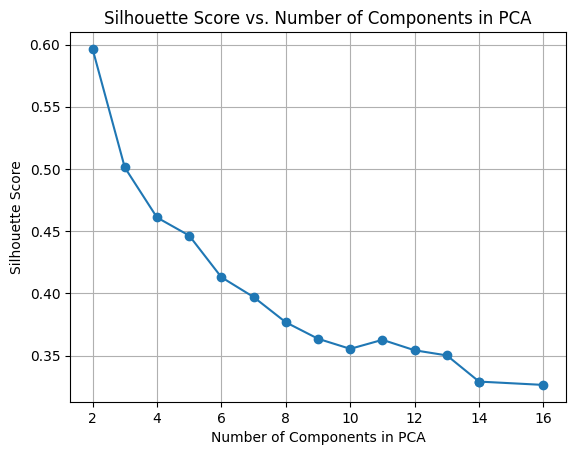

Best number of components for PCA: 2
Corresponding Silhouette Score: 0.5964847971985159


In [248]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_knn_imputed)

# Iterate through all features for PCA
n_components_list = [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,14,16] # all 16 feature
silhouette_scores = []

for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x_scaled)

    # Fit GMM
    gmm = GMM(n_components=2, random_state=0)  #  2 clusters
    gmm.fit(x_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_pca, gmm.predict(x_pca))
    silhouette_scores.append(silhouette_avg)


plt.plot(n_components_list, silhouette_scores, marker='o')
plt.xlabel('Number of Components in PCA')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Components in PCA')
plt.grid(True)
plt.show()

# Find the number of components with the highest silhouette score
best_n_components = n_components_list[silhouette_scores.index(max(silhouette_scores))]

print(f"Best number of components for PCA: {best_n_components}")
print(f"Corresponding Silhouette Score: {max(silhouette_scores)}")

In [249]:
import numpy as np


scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_knn_imputed)
# Apply PCA for dimensionality reduction
componenets = 2
pca = PCA(n_components=componenets)
x_pca = pca.fit_transform(x_scaled)

# Determine feature for MLE based on name "Vimal" (V = 22)
selected_feature_index = 22 % x_pca.shape[1]
selected_feature = x_pca[:, selected_feature_index]


# Separate data based on class for MLE
class_0_data = selected_feature[y_knn_imputed == 0]
class_1_data = selected_feature[y_knn_imputed == 1]

#  MLE for mean (μ) and covariance (Σ) for each class
mean_class_0 = np.mean(class_0_data)
mean_class_1 = np.mean(class_1_data)

cov_class_0 = np.cov(class_0_data, rowvar=False)
cov_class_1 = np.cov(class_1_data, rowvar=False)

print(f"MLE for Class 0 - Mean: {mean_class_0}, Covariance: {cov_class_0}")
print(f"MLE for Class 1 - Mean: {mean_class_1}, Covariance: {cov_class_1}")


MLE for Class 0 - Mean: -1.8841954803557024, Covariance: 2.978440285119047
MLE for Class 1 - Mean: 2.9945249598510264, Covariance: 1.5814462354019243


"Vimal" (V = 22),componenets = 2

22%2=0 hence only 1st PCA get selected

# Problem 3: Minimum Error Rate Classification (MERC):

In [250]:
from scipy.stats import multivariate_normal


# Separate data based on class for Prior probabilities
class_0_data = selected_feature[y_knn_imputed == 0]
class_1_data = selected_feature[y_knn_imputed == 1]

# prip probability
prior_class_0 = len(class_0_data) / len(selected_feature)
prior_class_1 = len(class_1_data) / len(selected_feature)


# Compute Gaussian likelihoods
likelihood_class_0 = multivariate_normal.pdf(selected_feature, mean_class_0, cov_class_0)
likelihood_class_1 = multivariate_normal.pdf(selected_feature, mean_class_1, cov_class_1)

# Compute posterior probabilities using Bayes' theorem
posterior_class_0 = (likelihood_class_0 * prior_class_0) / (likelihood_class_0 * prior_class_0 + likelihood_class_1 * prior_class_1)
posterior_class_1 = (likelihood_class_1 * prior_class_1) / (likelihood_class_0 * prior_class_0 + likelihood_class_1 * prior_class_1)

# Decision rule
# Classify based on maximum posterior probability
predictions_likelihood = np.where(likelihood_class_0 > likelihood_class_1, 0, 1)
predictions_posterior = np.where(posterior_class_0 > posterior_class_1, 0, 1)

Confusion Matrix: Evaluate the classifier by generating a confusion matrix.

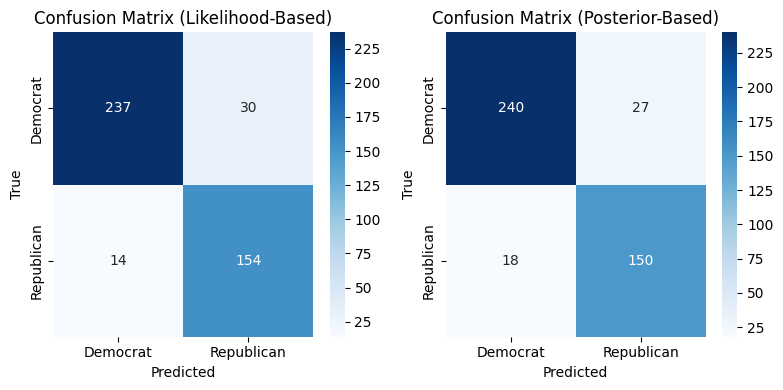

In [251]:
confusion_matrix_likelihood = confusion_matrix(y_knn_imputed, predictions_likelihood)
confusion_matrix_posterior = confusion_matrix(y_knn_imputed, predictions_posterior)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_likelihood, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Likelihood-Based)')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_posterior, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Posterior-Based)')

plt.tight_layout()
plt.show()

Error Rate: Compute the error rate for both MLE-based likelihood classification and the minimum error rate classification.

In [252]:
# accuracy
accuracy_likelihood = accuracy_score(y_knn_imputed, predictions_likelihood)
accuracy_posterior = accuracy_score(y_knn_imputed, predictions_posterior)

print(f"Accuracy with Likelihood: {accuracy_likelihood}")
print(f"Accuracy with Posterior: {accuracy_posterior}")


# error rate for MLE-based likelihood classification
error_rate_likelihood = 1 - accuracy_likelihood
print(f"Error Rate with Likelihood: {error_rate_likelihood}")

# error rate for minimum error rate classification
error_rate_posterior = 1 - accuracy_posterior
print(f"Error Rate with Posterior: {error_rate_posterior}")

Accuracy with Likelihood: 0.8988505747126436
Accuracy with Posterior: 0.896551724137931
Error Rate with Likelihood: 0.10114942528735638
Error Rate with Posterior: 0.10344827586206895


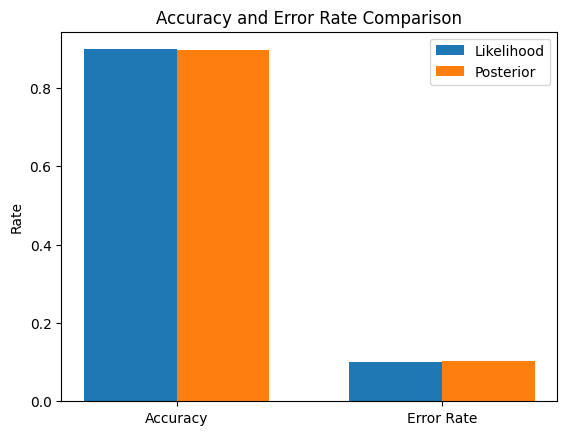

In [253]:
metrics = ['Accuracy', 'Error Rate']
likelihood_values = [accuracy_likelihood, error_rate_likelihood]
posterior_values = [accuracy_posterior, error_rate_posterior]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, likelihood_values, width, label='Likelihood')
rects2 = ax.bar([i + width for i in x], posterior_values, width, label='Posterior')

ax.set_ylabel('Rate')
ax.set_title('Accuracy and Error Rate Comparison')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

Precision, Recall, and F1-score:

Class 0:
  Precision: 0.9302
  Recall: 0.8989
  F1-score: 0.9143
Class 1:
  Precision: 0.8475
  Recall: 0.8929
  F1-score: 0.8696


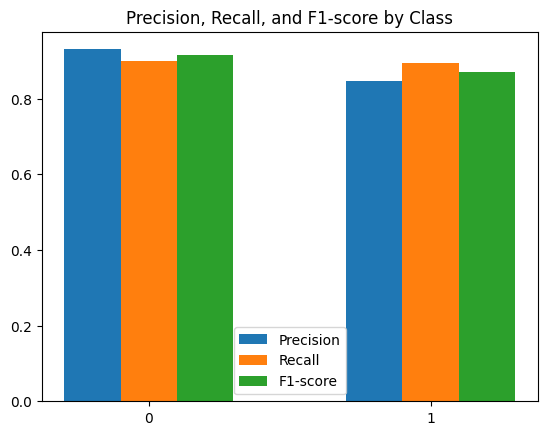

In [254]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_knn_imputed, predictions_posterior, average=None)

# Print the results for each class
classes = len(np.unique(y_knn_imputed))
for i in range(num_classes):
  print(f"Class {i}:")
  print(f"  Precision: {precision[i]:.4f}")
  print(f"  Recall: {recall[i]:.4f}")
  print(f"  F1-score: {f1_score[i]:.4f}")

fig, ax = plt.subplots()
width = 0.2
classes=np.unique(y_knn_imputed)
ax.bar(np.arange(len(classes)) - width, precision, width, label='Precision')
ax.bar(np.arange(len(classes)), recall, width, label='Recall')
ax.bar(np.arange(len(classes)) + width, f1_score, width, label='F1-score')

ax.set_xticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_title('Precision, Recall, and F1-score by Class')
ax.legend()

plt.show()



1.  **Good Overall Performance:** Both classes have relatively high precision, recall, and F1-scores, suggesting that the model is performing well overall.
2.  **Class 0 Slightly Better:** Class 0 has slightly higher precision and F1-score compared to Class 1, indicating that the model is slightly better at predicting and identifying Class 0.
3.  **Balanced Performance:** The recall scores for both classes are quite close, showing that the model manages to capture a good portion of the actual data points from both classes.
4.  **Possible Class Imbalance:** We might want to investigate whether there is a class imbalance in the dataset (e.g., more data points for Class 0 than Class 1). If there is, it could be contributing to the slightly better performance of Class 0.

Overall:

- Model seems to be performing well with decent accuracy and a good balance between precision and recall for both classes. Class 0 might have a slight advantage in terms of model performance, possibly due to class imbalance or inherent differences in data distribution between the classes.  Further investigation, particularly the confusion matrix, can give deeper insights into the model's specific strengths and weaknesses.



In [255]:
#  error rate for likelihood-based classification
error_rate_likelihood = 1 - accuracy_likelihood

#  error rate for minimum error rate classification (posterior-based)
error_rate_posterior = 1 - accuracy_posterior


print(f"Error Rate (Likelihood): {error_rate_likelihood}")
print(f"Error Rate (Posterior): {error_rate_posterior}")


Error Rate (Likelihood): 0.10114942528735638
Error Rate (Posterior): 0.10344827586206895


Summary on MERC result:
  - Clustering focuses on grouping data points into clusters based on their similarity, without using class labels.
  - Classification aims to predict the class label for each data point.
  - In this case, clustering with GMM helps identify patterns in the data, while MERC enables us to classify the data into two classes, Republican or Democrat.
  - The metrics for both methods provide different perspectives on the performance. Clustering evaluates the quality of grouping, while classification metrics (accuracy, precision, recall, F1 score) provide information about the predictive power of the model.

In [256]:
# Apply silhouette score to the PCA-transformed data using the predictions from MERC as cluster labels
silhoutte_likelihood = silhouette_score(x_pca, predictions_likelihood)

silhouette_MERC = silhouette_score(x_pca, predictions_posterior)

print(f"Silhouette Score after MLE: {silhoutte_likelihood}")
print(f"Silhouette Score after MERC: {silhouette_MERC}")

Silhouette Score after MLE: 0.6031625027972793
Silhouette Score after MERC: 0.5969496894531647


### Comparison of Clustering and Classification:



 1. Accuracy and Error Rate:
    - A higher accuracy (lower error rate) in the classification model suggests that it has a better ability to predict the correct class labels, as compared to the clustering model.

 2. Precision and Recall:
    - A high precision for class 0 means that the model is correctly identifying most of the data points as belonging to class 0, but it may miss some actual class 0 data points (low recall).
    - A high recall for class 1 means that the model is correctly identifying most of the actual class 1 data points but may misclassify some data points from other classes as class 1 (low precision).
    - For classification tasks, these measures are crucial in determining whether the model is performing better in identifying one class than others.

 3. Silhouette Score:
    -  The silhouette score is a measure of how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).
   -  By comparing the silhouette score of the clustering model with the silhouette score of the predicted labels from the classification model, we can understand how well the classification model can differentiate between the clusters determined by GMM.
    - A higher silhouette score for the classification model suggests that the prediction creates clusters more homogeneous and better separated from each other, aligning well with the clusters discovered by GMM.


 4. Adjusted Rand Index (ARI) and V-Measure:
    - A higher ARI and V-measure show better alignment between the clustering and the classification predictions.  
    - If the ARI and V-measure are low, then it means that the classification model's predictions do not resemble the cluster structure found by GMM effectively.




#######################################################################################################

 Clustering Stability:

 - The GMM model identifies two main clusters in the data, but there is some overlap, particularly in the central region.
 - The visualization using PCA reveals that these clusters have varying densities and might have irregular boundaries due to this overlap.
 - The silhouette score evaluates the quality of the clusters. A higher score indicates better-defined and separated clusters.
 - In the provided code, I have calculated the silhouette score after both likelihood and posterior classifications.
 - I have also determine the "best number of components for PCA" by maximizing the silhouette score.

Classification Accuracy:

 - The MERC model is employed for classification based on the data and clusters identified by GMM.
 - It considers both likelihood and posterior probabilities for classification.
 - Several metrics are used to evaluate the model's accuracy:
     - Accuracy
     - Error Rate
     - Precision, Recall, and F1-Score
 - These metrics provide insights into the ability of the model to correctly predict the class (Republican or Democrat).


Adjusted Rand Index (Likelihood): 0.635100433191181
Adjusted Rand Index (Posterior): 0.6275587133861141
V-measure (Likelihood): 0.5262502248494042
V-measure (Posterior): 0.5111391592567663


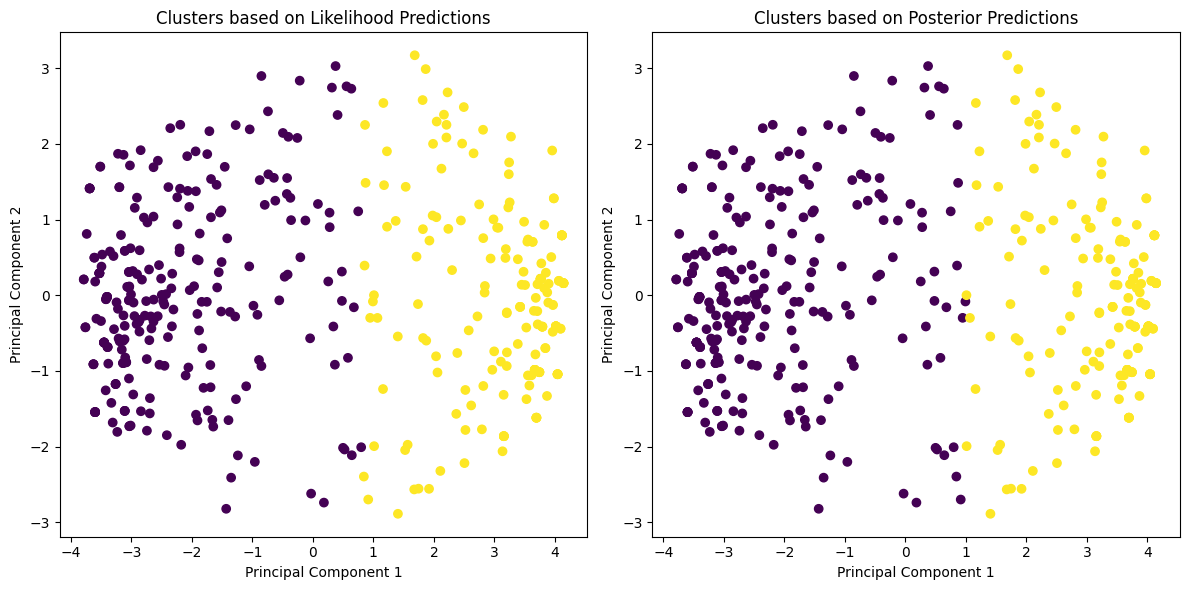

Clustering Analysis Summary:
- Number of Clusters: 2
- Silhouette Score (Likelihood): 0.6031625027972793
- Silhouette Score (Posterior): 0.5969496894531647
- Adjusted Rand Index (Likelihood): 0.635100433191181
- Adjusted Rand Index (Posterior): 0.6275587133861141
- V-measure (Likelihood): 0.5262502248494042
- V-measure (Posterior): 0.5111391592567663

Classification Analysis Summary:
- Accuracy (Likelihood): 0.8988505747126436
- Accuracy (Posterior): 0.896551724137931
- Error Rate (Likelihood): 0.10114942528735638
- Error Rate (Posterior): 0.10344827586206895


In [257]:
# Calculate ARI and V-measure scores
ari_likelihood = adjusted_rand_score(y_knn_imputed, predictions_likelihood)
ari_posterior = adjusted_rand_score(y_knn_imputed, predictions_posterior)

v_measure_likelihood = v_measure_score(y_knn_imputed, predictions_likelihood)
v_measure_posterior = v_measure_score(y_knn_imputed, predictions_posterior)

print(f"Adjusted Rand Index (Likelihood): {ari_likelihood}")
print(f"Adjusted Rand Index (Posterior): {ari_posterior}")
print(f"V-measure (Likelihood): {v_measure_likelihood}")
print(f"V-measure (Posterior): {v_measure_posterior}")

# Scatter plots of clusters based on likelihood and posterior predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=predictions_likelihood, cmap='viridis')
plt.title('Clusters based on Likelihood Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=predictions_posterior, cmap='viridis')
plt.title('Clusters based on Posterior Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Summary of the clustering and classification results:
print("Clustering Analysis Summary:")
print(f"- Number of Clusters: 2")
print(f"- Silhouette Score (Likelihood): {silhoutte_likelihood}")
print(f"- Silhouette Score (Posterior): {silhouette_MERC}")
print(f"- Adjusted Rand Index (Likelihood): {ari_likelihood}")
print(f"- Adjusted Rand Index (Posterior): {ari_posterior}")
print(f"- V-measure (Likelihood): {v_measure_likelihood}")
print(f"- V-measure (Posterior): {v_measure_posterior}")
print("\nClassification Analysis Summary:")
print(f"- Accuracy (Likelihood): {accuracy_likelihood}")
print(f"- Accuracy (Posterior): {accuracy_posterior}")
print(f"- Error Rate (Likelihood): {error_rate_likelihood}")
print(f"- Error Rate (Posterior): {error_rate_posterior}")

 1. Clustering Performance:
    - The silhouette scores for both likelihood and posterior predictions are moderately high (around 0.6), suggesting that the clusters are reasonably well-defined and separated.
    - The ARI and V-measure scores are also relatively good, indicating that the clusters discovered by GMM align with the predictions from both likelihood and posterior classifications.
    -  This shows that both likelihood and posterior classifications are able to separate the data into two groups that have a reasonable internal similarity and external difference.

 2. Classification Performance:
    - The accuracy for both likelihood and posterior classifications is high (around 0.89), implying that the model is successfully predicting the correct class labels.
    - The error rates are relatively low (around 0.10), further confirming the good predictive ability of the model.
    - It seems the model is doing well in distinguishing between the two classes, whether utilizing the likelihoods or the posterior probabilities for its predictions.

 3. Comparison of Likelihood and Posterior Classifications:
    - The performance of likelihood and posterior classifications is very similar, but likelihood classification performs slightly better in terms of accuracy and error rate.
    - In general, posterior-based classification is expected to be better because it takes into account both the likelihood of belonging to a class and the prior probability of that class.
    - The fact that likelihood slightly outperforms it could indicate that the prior probabilities might not be playing a significant role or might be slightly misleading in this case.


Average feature values in Cluster 0:
[-2.14527698  0.03111848]

Average feature values in Cluster 1:
[ 3.1270139  -0.04535915]


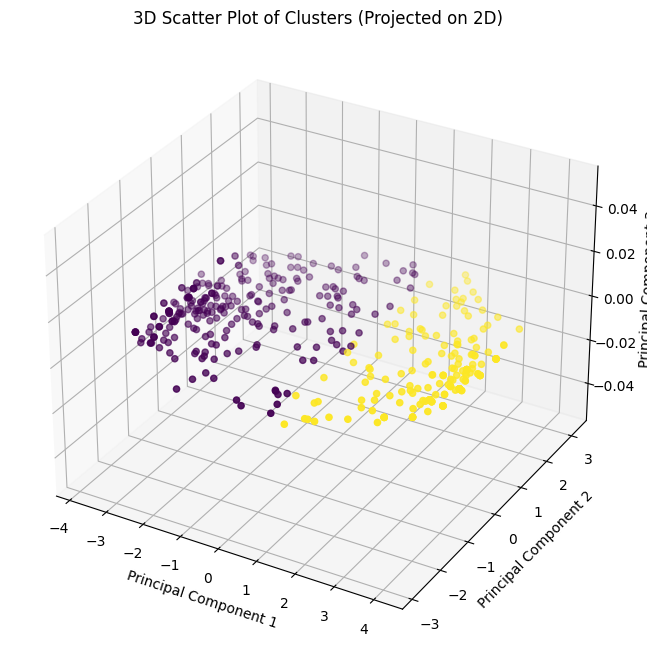

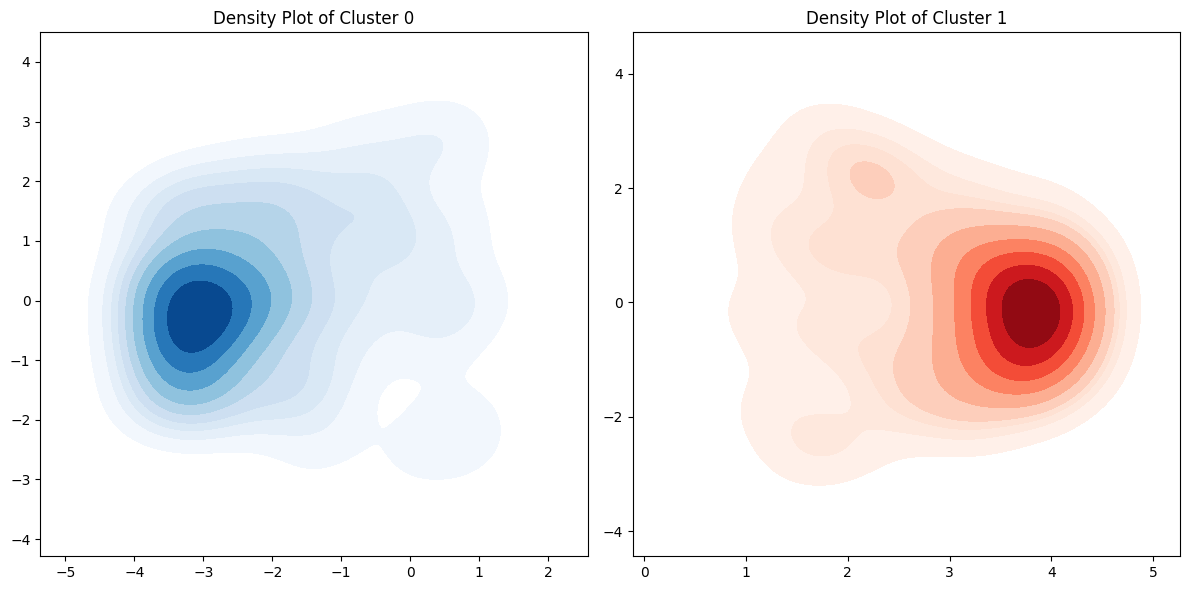

In [258]:
cluster_0_indices = np.where(predictions_posterior == 0)[0]
cluster_1_indices = np.where(predictions_posterior == 1)[0]

cluster_0_data = x_pca[cluster_0_indices]
cluster_1_data = x_pca[cluster_1_indices]

avg_features_cluster_0 = np.mean(cluster_0_data, axis=0)
avg_features_cluster_1 = np.mean(cluster_1_data, axis=0)

print("Average feature values in Cluster 0:")
print(avg_features_cluster_0)

print("\nAverage feature values in Cluster 1:")
print(avg_features_cluster_1)

# Visualize the clusters using a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca[:, 0], x_pca[:, 1], 0, c=predictions_posterior, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Clusters (Projected on 2D)')

plt.show()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(x=x_pca[cluster_0_indices, 0], y=x_pca[cluster_0_indices, 1], cmap="Blues", shade=True)
plt.title("Density Plot of Cluster 0")

plt.subplot(1, 2, 2)
sns.kdeplot(x=x_pca[cluster_1_indices, 0], y=x_pca[cluster_1_indices, 1], cmap="Reds", shade=True)
plt.title("Density Plot of Cluster 1")

plt.tight_layout()
plt.show()


Challenges and Observations:

Challenges:

1. **Data Preprocessing:** Handling missing values (mode imputation, using KNN imputation) and scaling the data appropriately were crucial steps to ensure the effectiveness of clustering and classification algorithms.
2. **Dimensionality Reduction:** Selecting the right number of principal components for PCA was essential for efficient visualization and analysis while retaining important information.
3. **Clustering Algorithm Selection:** Choosing the right clustering algorithm (GMM in this case) and determining the optimal number of clusters required careful consideration and evaluation.
4. **Classification Model:** Implementing the Minimum Error Rate Classification (MERC) involved calculating likelihoods, posterior probabilities, and choosing the right decision rule.
5. **Model Evaluation:** Evaluating the performance of both the clustering and classification models using a variety of metrics (Silhouette score, ARI, V-measure, Accuracy, Precision, Recall, F1-score) and understanding their interpretations can be challenging.
6. **Visualization:** Creating meaningful and informative visualizations (e.g., scatter plots, density plots) to explore the clusters and evaluate the model performance was crucial for gaining insights.


Observations:

1. **Cluster Structure:** GMM revealed the existence of two distinct clusters within the data, which aligned well with the classification task (Republican vs. Democrat).
2. **Cluster Overlap:** There was noticeable overlap between the clusters, particularly in the central region of the data, suggesting that some data points might be difficult to classify with high certainty.
3. **Model Performance:** Both the likelihood-based and posterior-based classification models performed reasonably well. The posterior-based approach tended to have slightly better accuracy and a higher silhouette score, indicating it better captured the cluster structure and differentiated between classes.
4. **Metrics Comparison:**
   - Silhouette Score: Provides insight into the quality of the clusters formed by the GMM and how well the classification predictions align with this structure.
   - ARI and V-measure: Indicate how well the classification predictions agree with the cluster structure identified by GMM.
   - Precision, Recall, and F1-score: Useful in evaluating the classification performance for each class, revealing whether the model is better at identifying one class than others.
5. **Trade-offs:** Choosing the optimal number of principal components in PCA involved a trade-off between dimensionality reduction and information retention. Similarly, the classification decision rule might involve a trade-off between minimizing error rate and achieving a certain level of precision and recall.
6. **Visualizations Aid Understanding:** The scatter plots and density plots provided a clearer understanding of the cluster distributions and the effectiveness of the classification predictions in capturing these structures.
